In [1]:
from PIL import Image
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

# Downloading and resizing the image from the URL
image_url = 'https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg'
response = requests.get(image_url, stream=True)
image = Image.open(response.raw)
image = image.resize((450, 250))

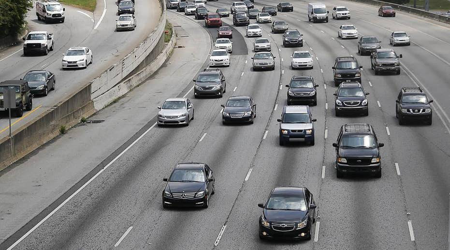

In [2]:
image

In [3]:
image = cv2.imread('car2.jpg')

In [4]:
image

array([[[155, 150, 149],
        [148, 143, 142],
        [124, 116, 116],
        ...,
        [ 46,  43,  39],
        [ 52,  49,  45],
        [ 61,  58,  54]],

       [[159, 154, 153],
        [124, 119, 118],
        [ 94,  86,  86],
        ...,
        [ 64,  59,  56],
        [ 63,  60,  56],
        [ 66,  61,  58]],

       [[129, 124, 123],
        [ 98,  93,  92],
        [ 82,  74,  74],
        ...,
        [ 87,  80,  77],
        [ 79,  74,  71],
        [ 77,  70,  67]],

       ...,

       [[ 81,  69,  65],
        [ 81,  69,  65],
        [ 80,  69,  65],
        ...,
        [ 86,  74,  74],
        [ 86,  74,  74],
        [ 85,  73,  73]],

       [[ 80,  68,  64],
        [ 80,  68,  64],
        [ 79,  68,  64],
        ...,
        [ 86,  74,  74],
        [ 86,  74,  74],
        [ 85,  73,  73]],

       [[ 80,  68,  64],
        [ 80,  68,  64],
        [ 79,  68,  64],
        ...,
        [ 86,  74,  74],
        [ 86,  74,  74],
        [ 85,  73,  73]]

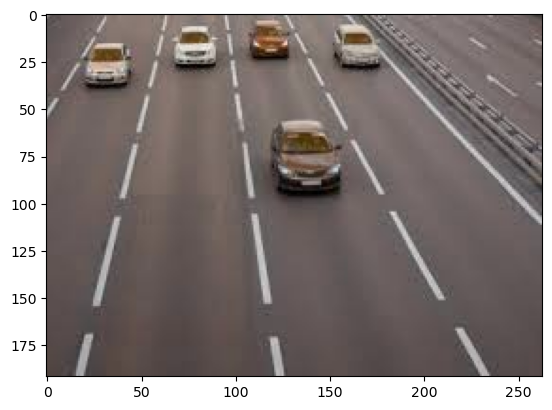

In [5]:
plt.imshow(image)

In [6]:
# Convert the image to a Numpy array
image_arr = np.array(image)

# Show the converted Numpy array as an image
cv2.imshow("Converted Image to Numpy Array", image_arr)
cv2.waitKey(0)
cv2.destroyAllWindows()

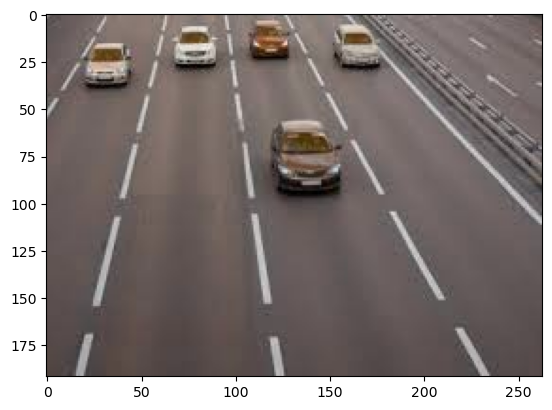

In [7]:
plt.imshow(image_arr)

In [8]:
# Convert the image to grayscale
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)

# Show the grayscale image
cv2.imshow("Grayscale Image", grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

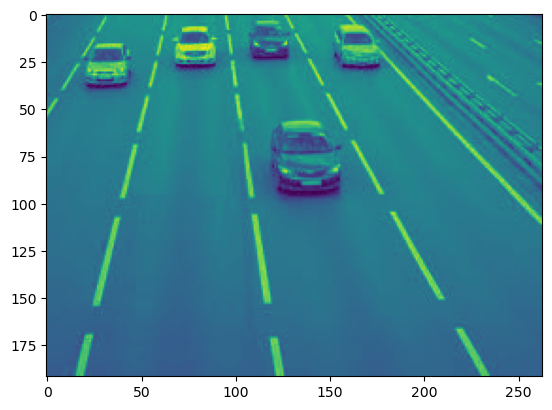

In [9]:
plt.imshow(grey)

In [10]:
# Apply Gaussian blur to the grayscale image
blur = cv2.GaussianBlur(grey, (5, 5), 0)

# Show the blurred image
cv2.imshow("Blurred Image", blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

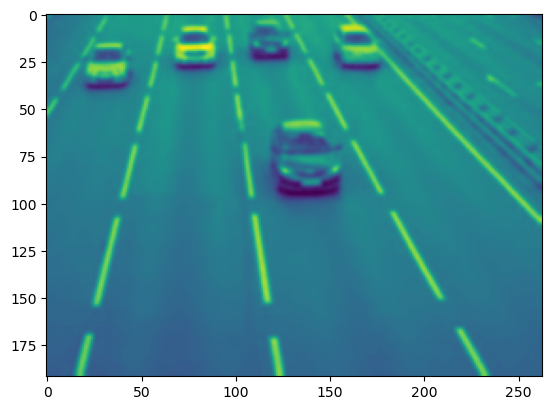

In [11]:
plt.imshow(blur)

In [12]:
# Apply dilation to the blurred image
dilated = cv2.dilate(blur, np.ones((3, 3)))

# Show the dilated image
cv2.imshow("Dilated Image", dilated)
cv2.waitKey(0)
cv2.destroyAllWindows()

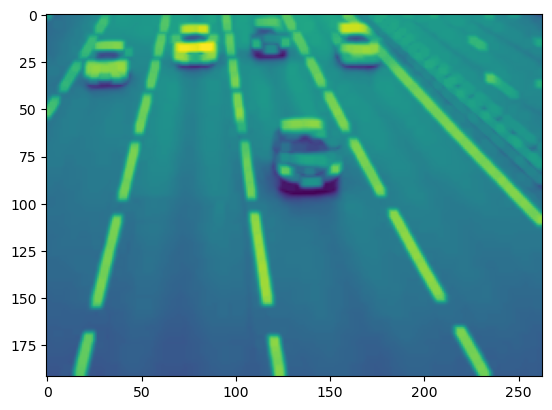

In [13]:
plt.imshow(dilated)

In [14]:
# Apply morphological closing to the dilated image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

# Show the morphologically closed image
cv2.imshow("Morphologically Closed Image", closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

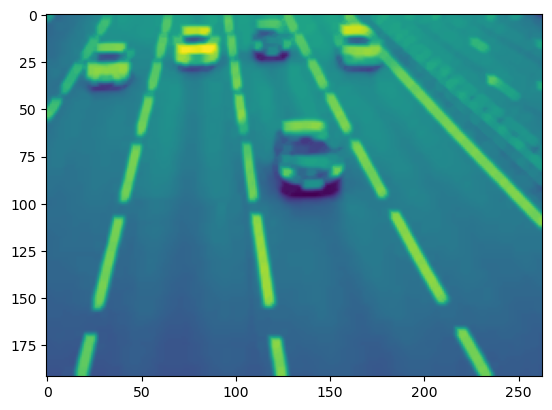

In [15]:
plt.imshow(closing)

In [16]:
# Use CascadeClassifier for car detection
car_cascade_src = 'haarcascade_car.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

In [17]:
cars.shape[0]

5

In [18]:
# Draw rectangles around each detected car and count
cnt = 0
for (x, y, w, h) in cars:
    cv2.rectangle(image_arr, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cnt += 1

# Print the total number of detected cars and buses
print(cnt, " cars found")

# Convert the annotated image to PIL Image format and display it
annotated_image = Image.fromarray(image_arr)
annotated_image.show()

# Close the window when a key is pressed
cv2.waitKey(0)
cv2.destroyAllWindows()

5  cars found


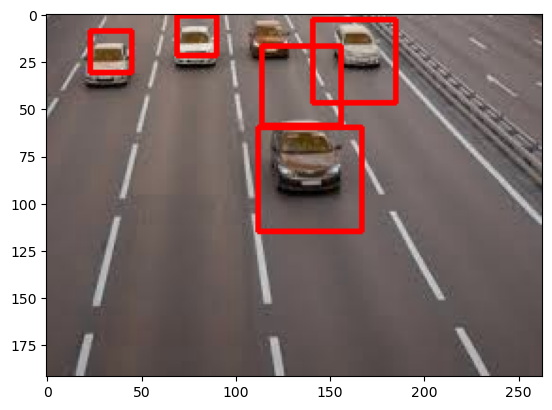

In [19]:
plt.imshow(annotated_image)